<a href="https://colab.research.google.com/github/vinodnbhat/AIML-CEP-2021-Assignments/blob/main/Final%20Asgn_Q2_Base%20case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

(a) [C, R] Some of the attributes in the data set are text data. Use a suitable procedure to convert them into suitable numerical representations in the training data and test data. Explain the procedure you used for the conversion.

In [4]:
spam_classification_train_data = pd.read_excel('Q2_classification_train.xlsx', index_col = False)
spam_classification_train_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,no,0,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,0,0,0,no,0,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,0,0,0,no,0,0,0,13.256,255,1,0,0,0,48,small
3,0,0,1,0,0,0,0,0,no,0,0,2,1.231,29,0,0,0,0,1,none
4,0,0,1,0,0,0,0,0,no,0,0,2,1.091,25,0,0,0,0,1,none


In [5]:
spam_classification_train_data['winner'] =spam_classification_train_data['winner'].astype('category').cat.codes
spam_classification_train_data['number'] =spam_classification_train_data['number'].astype('category').cat.codes
spam_classification_train_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1


In [6]:
spam_classification_train_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,0,0,0,0,1.597,46,0,0,1,0,3,2
3132,1,0,1,0,0,0,0,1,0,0,0,0,0.333,13,0,0,0,0,0,0
3133,1,0,1,0,0,0,0,0,0,0,0,0,0.332,12,0,0,0,0,0,2
3134,1,0,1,0,0,0,0,2,1,0,0,0,2.225,65,0,0,1,0,1,2


In [7]:
spam_classification_test_data = pd.read_excel('Q2_classification_test.xlsx', index_col = False)
spam_classification_test_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,no,0,0,0,20.133,364,1,0,0,0,8,small
1,1,0,1,0,0,0,0,0,no,0,0,0,3.796,71,1,0,0,0,4,small
2,1,0,1,0,0,0,0,0,no,0,0,0,2.705,35,1,0,0,0,0,none
3,1,0,1,4,0,0,2,0,no,0,0,0,0.537,22,0,0,0,0,3,small
4,1,0,1,0,0,0,0,0,no,0,0,0,4.174,2,0,0,0,0,0,none


In [8]:
spam_classification_test_data['winner'] =spam_classification_test_data['winner'].astype('category').cat.codes
spam_classification_test_data['number'] =spam_classification_test_data['number'].astype('category').cat.codes
spam_classification_test_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,1,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,1,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,1,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1


In [9]:
spam_classification_test_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,1,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,1,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,1,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,0,0,0,0,31.104,744,1,0,0,0,3,2
781,0,0,1,0,0,0,0,0,0,0,0,0,30.201,728,1,0,0,0,3,2
782,0,0,1,0,0,0,0,10,0,0,0,0,74.753,1953,1,0,0,0,27,2
783,0,0,1,0,0,0,0,25,0,0,0,0,16.863,570,1,0,0,0,3,2


Checking class balance of training data

In [11]:
# Checking class balance of training data
train_spam_class_0 = spam_classification_train_data[spam_classification_train_data['spam'] == 0]
train_spam_class_1 = spam_classification_train_data[spam_classification_train_data['spam'] == 1]
print('Train spam_class 0:', train_spam_class_0.shape)
print('Train spam_class 1:', train_spam_class_1.shape)
print('Training data shows class imbalance')

Train spam_class 0: (2842, 20)
Train spam_class 1: (294, 20)
Training data shows class imbalance


In [12]:
# Checking class balance of test data
test_spam_class_0 = spam_classification_test_data[spam_classification_test_data['spam'] == 0]
test_spam_class_1 = spam_classification_test_data[spam_classification_test_data['spam'] == 1]
print('Test spam class 0:', test_spam_class_0.shape)
print('Test spam class 1:', test_spam_class_1.shape)
print('Test data shows class imbalance')

Test spam class 0: (712, 20)
Test spam class 1: (73, 20)
Test data shows class imbalance


In [13]:
n_train = len(spam_classification_train_data.index)
print('number of datapoints in train dataset:', n_train)

n_test = len(spam_classification_test_data.index)
print('number of datapoints in test dataset:', n_test)

number of datapoints in train dataset: 3136
number of datapoints in test dataset: 785


In [14]:
np.random.seed(1000) #for reproducibility
#Create an index array 
indexarr_train = np.arange(n_train) #index array
np.random.shuffle(indexarr_train) #shuffle the indices 
print('shuffled indices of training samples:')
print(indexarr_train)
print('\n')

indexarr_test = np.arange(n_test) #index array
np.random.shuffle(indexarr_test) #shuffle the indices 
print('shuffled indices of test samples:')
print(indexarr_test)

shuffled indices of training samples:
[ 294 1375 1676 ... 2119  599 1459]


shuffled indices of test samples:
[170 227 545 477 723 596 564 154 453 213 708 679 133 199 664 165 377 508
 100 487 177 264 539  15 604 531 256 407 699 190 327 313 180 614 563 760
 374 220 289 709 362 379 397 205 705 575 646 446 483 438 120 571 273 353
 243 621 370 187 612 779  16 448  29 107 777 382 478 134 592 443 229 482
 464 175 573 648  85 326 371 609  98 653 552   5 601 210 565 288  68  31
 318 163 343 330 186 559 426 429 116 388  59 781 295 361 756 641 776 689
 589 465 307 329 490 537 620 149  57 576 497 735 339 383 271 112 189 276
 399 216 762 441 613 272 595  54 234 333 368 431 661 700  58 129 540 122
 450  64 695  71 639 716 108 586 597  17 542 447 585 281 704 682 493 703
 405  50 349 425 650 737 767 178 520 201 248 616 624 628 677 355 561 452
 736 285 654 150 298 619 357 230 517 662 287 166 784 124 512 749 350 158
 687 109  60 686 225 204 212 194 202 351  30  81 530 125 643  95 378 413
 385 138 605  

In [15]:
cols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ,14 ,15, 16, 17, 18, 19]
response_cols = [0]

In [16]:
train_X_data = spam_classification_train_data[spam_classification_train_data.columns[cols]]
train_X_data

,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,0,1,0,0,0,0,2,0,0,0,0,1.597,46,0,0,1,0,3,2
3132,0,1,0,0,0,0,1,0,0,0,0,0.333,13,0,0,0,0,0,0
3133,0,1,0,0,0,0,0,0,0,0,0,0.332,12,0,0,0,0,0,2
3134,0,1,0,0,0,0,2,1,0,0,0,2.225,65,0,0,1,0,1,2


In [17]:
train_X_array = train_X_data.to_numpy()
train_X_array

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  1.,  2.],
       [ 0.,  1.,  0., ...,  0., 48.,  2.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  0.,  2.],
       [ 0.,  1.,  0., ...,  0.,  1.,  2.],
       [ 0.,  1.,  0., ...,  0.,  0.,  2.]])

In [18]:
train_y = spam_classification_train_data[spam_classification_train_data.columns[response_cols]].to_numpy()
train_y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [19]:
train_X = train_X_array[indexarr_train[0:n_train]]
train_y = train_y[indexarr_train[0:n_train]]
print('shape of train data features:')
print(train_X.shape)
print('shape of train data labels')
print(train_y.shape)

shape of train data features:
(3136, 19)
shape of train data labels
(3136, 1)


In [20]:
test_X_data = spam_classification_test_data[spam_classification_test_data.columns[cols]]
test_X_data

,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,1,0,0,0,0,0,0,0,0,0,31.104,744,1,0,0,0,3,2
781,0,1,0,0,0,0,0,0,0,0,0,30.201,728,1,0,0,0,3,2
782,0,1,0,0,0,0,10,0,0,0,0,74.753,1953,1,0,0,0,27,2
783,0,1,0,0,0,0,25,0,0,0,0,16.863,570,1,0,0,0,3,2


In [21]:
test_X_array = test_X_data.to_numpy()
test_X_array

array([[ 0.,  1.,  0., ...,  0.,  8.,  2.],
       [ 0.,  1.,  0., ...,  0.,  4.,  2.],
       [ 0.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  1.,  0., ...,  0., 27.,  2.],
       [ 0.,  1.,  0., ...,  0.,  3.,  2.],
       [ 1.,  1.,  0., ...,  0.,  2.,  0.]])

In [22]:
test_y = spam_classification_test_data[spam_classification_test_data.columns[response_cols]].to_numpy()
test_y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [23]:
test_X = test_X_array[indexarr_test[0:n_test]]
test_y = test_y[indexarr_test[0:n_test]]
print('shape of test data features:')
print(test_X.shape)
print('shape of test data labels')
print(test_y.shape)

shape of test data features:
(785, 19)
shape of test data labels
(785, 1)


(b) [C] For each of the following classification methods build a classification model using the training data:

i. Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() #define a model using Gaussian version Naive Bayes classifier
nb_model.fit(train_X, train_y.ravel()) #fit the model using the training data

GaussianNB()

In [25]:
predicted_train_y = nb_model.predict(train_X)
predicted_test_y = nb_model.predict(test_X)

In [26]:
from sklearn.metrics import classification_report
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2842
           1       0.29      0.14      0.18       294

    accuracy                           0.89      3136
   macro avg       0.60      0.55      0.56      3136
weighted avg       0.86      0.89      0.87      3136

Test Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       712
           1       0.46      0.30      0.36        73

    accuracy                           0.90       785
   macro avg       0.69      0.63      0.66       785
weighted avg       0.89      0.90      0.89       785



In [27]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[2743   99]
 [ 254   40]]
Confusion matrix test set:
[[686  26]
 [ 51  22]]


Text(0.5, 0.98, 'Confusion Matrix')

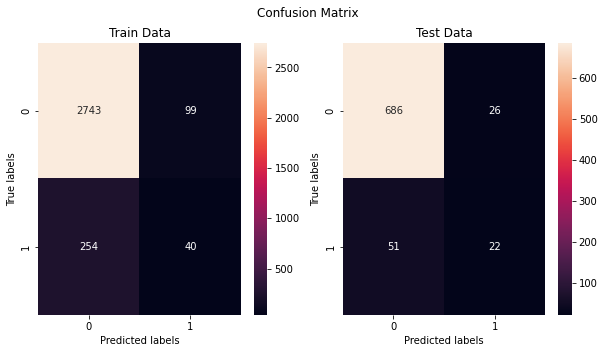

In [28]:
import seaborn as sns
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')

ii. Logistics Regression

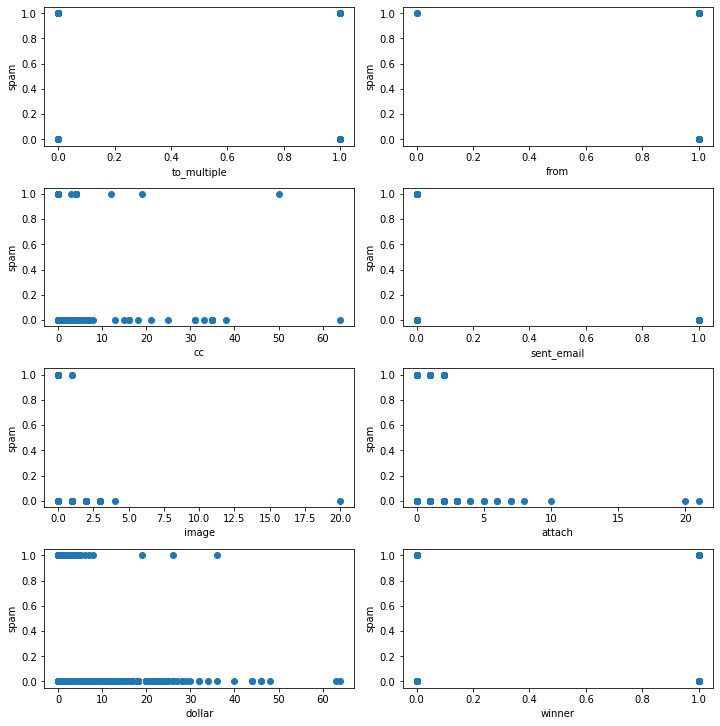

In [29]:
fig = plt.figure(figsize=(10, 10))
fig.constrained_layout = True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)
ax22 = fig.add_subplot(424)

ax31 = fig.add_subplot(425)
ax32 = fig.add_subplot(426)
ax41 = fig.add_subplot(427)
ax42 = fig.add_subplot(428)

ax11.scatter(spam_classification_train_data['to_multiple'], spam_classification_train_data['spam'])
ax11.set_xlabel('to_multiple')
ax11.set_ylabel('spam')

ax12.scatter(spam_classification_train_data['from'], spam_classification_train_data['spam'])
ax12.set_xlabel('from')
ax12.set_ylabel('spam')

ax21.scatter(spam_classification_train_data['cc'], spam_classification_train_data['spam'])
ax21.set_xlabel('cc')
ax21.set_ylabel('spam')

ax22.scatter(spam_classification_train_data['sent_email'], spam_classification_train_data['spam'])
ax22.set_xlabel('sent_email')
ax22.set_ylabel('spam')

ax31.scatter(spam_classification_train_data['image'], spam_classification_train_data['spam'])
ax31.set_xlabel('image')
ax31.set_ylabel('spam')

ax32.scatter(spam_classification_train_data['attach'], spam_classification_train_data['spam'])
ax32.set_xlabel('attach')
ax32.set_ylabel('spam')

ax41.scatter(spam_classification_train_data['dollar'], spam_classification_train_data['spam'])
ax41.set_xlabel('dollar')
ax41.set_ylabel('spam')

ax42.scatter(spam_classification_train_data['winner'], spam_classification_train_data['spam'])
ax42.set_xlabel('winner')
ax42.set_ylabel('spam')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


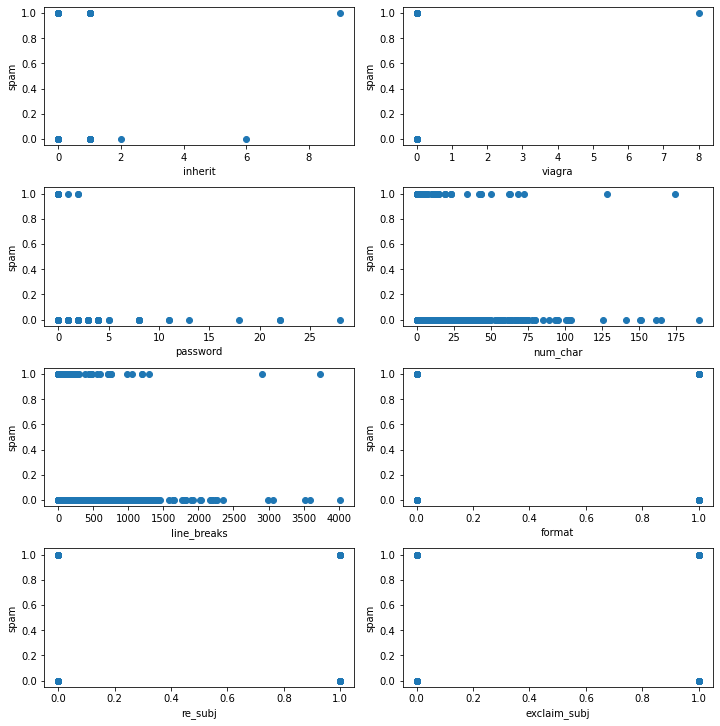

In [30]:
fig = plt.figure(figsize=(10, 10))
fig.constrained_layout = True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)
ax22 = fig.add_subplot(424)

ax31 = fig.add_subplot(425)
ax32 = fig.add_subplot(426)
ax41 = fig.add_subplot(427)
ax42 = fig.add_subplot(428)

ax11.scatter(spam_classification_train_data['inherit'], spam_classification_train_data['spam'])
ax11.set_xlabel('inherit')
ax11.set_ylabel('spam')

ax12.scatter(spam_classification_train_data['viagra'], spam_classification_train_data['spam'])
ax12.set_xlabel('viagra')
ax12.set_ylabel('spam')

ax21.scatter(spam_classification_train_data['password'], spam_classification_train_data['spam'])
ax21.set_xlabel('password')
ax21.set_ylabel('spam')

ax22.scatter(spam_classification_train_data['num_char'], spam_classification_train_data['spam'])
ax22.set_xlabel('num_char')
ax22.set_ylabel('spam')

ax31.scatter(spam_classification_train_data['line_breaks'], spam_classification_train_data['spam'])
ax31.set_xlabel('line_breaks')
ax31.set_ylabel('spam')

ax32.scatter(spam_classification_train_data['format'], spam_classification_train_data['spam'])
ax32.set_xlabel('format')
ax32.set_ylabel('spam')

ax41.scatter(spam_classification_train_data['re_subj'], spam_classification_train_data['spam'])
ax41.set_xlabel('re_subj')
ax41.set_ylabel('spam')

ax42.scatter(spam_classification_train_data['exclaim_subj'], spam_classification_train_data['spam'])
ax42.set_xlabel('exclaim_subj')
ax42.set_ylabel('spam')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

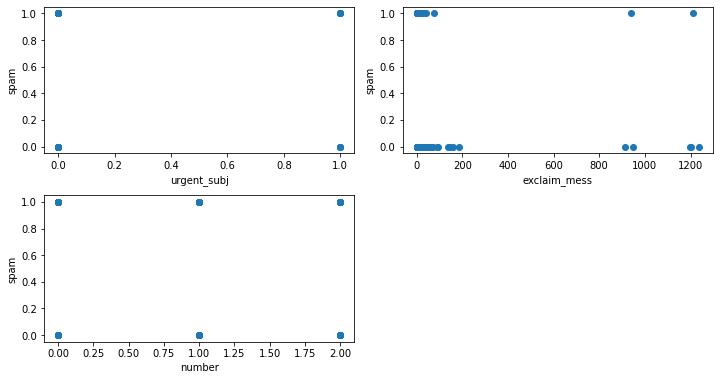

In [31]:
fig = plt.figure(figsize=(10, 10))
fig.constrained_layout = True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)

ax11.scatter(spam_classification_train_data['urgent_subj'], spam_classification_train_data['spam'])
ax11.set_xlabel('urgent_subj')
ax11.set_ylabel('spam')

ax12.scatter(spam_classification_train_data['exclaim_mess'], spam_classification_train_data['spam'])
ax12.set_xlabel('exclaim_mess')
ax12.set_ylabel('spam')

ax21.scatter(spam_classification_train_data['number'], spam_classification_train_data['spam'])
ax21.set_xlabel('number')
ax21.set_ylabel('spam')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [69]:
from sklearn.linear_model import LogisticRegression
# creating an object of LogisticRegression class
logit = LogisticRegression(C=1e6, max_iter=10000) # C is set to be large number in order to remove the inbuilt regularization 
# fitting the training data
logit.fit(train_X,train_y.ravel())

LogisticRegression(C=1000000.0, max_iter=10000)

In [33]:
print(logit.intercept_)
print(logit.coef_)

[1.27128419]
[[-2.82057133 -1.08400229  0.00976116 -6.56965482 -2.42677709  0.67044594
  -0.08103563  1.59033921  0.39750102  1.18758173 -0.93430353  0.07122109
  -0.0067053  -0.88409343 -1.68215452  0.14035455  4.18971816  0.01208265
  -0.55057305]]


In [34]:
predicted_train_y = logit.predict(train_X)
predicted_test_y = logit.predict(test_X)

In [35]:
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2842
           1       0.62      0.15      0.24       294

    accuracy                           0.91      3136
   macro avg       0.77      0.57      0.60      3136
weighted avg       0.89      0.91      0.89      3136

Test Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       712
           1       0.73      0.30      0.43        73

    accuracy                           0.92       785
   macro avg       0.83      0.65      0.69       785
weighted avg       0.91      0.92      0.91       785



In [36]:
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[2816   26]
 [ 251   43]]
Confusion matrix test set:
[[704   8]
 [ 51  22]]


Text(0.5, 0.98, 'Confusion Matrix')

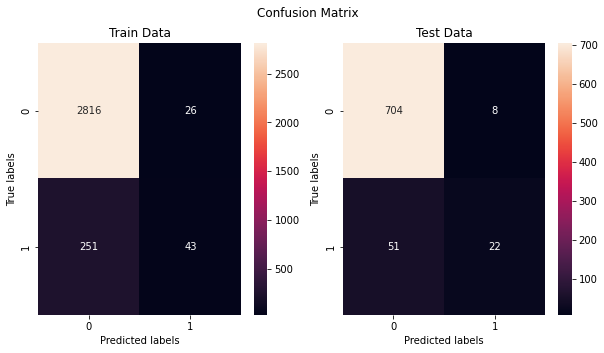

In [37]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')

iii. Soft-Margin SVM

In [38]:
from sklearn import svm
from sklearn.svm import LinearSVC #linear svm from scikit learn 

clf = LinearSVC(random_state=0, tol=1e-3, max_iter=100000)
clf_model = clf.fit(train_X,train_y.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [39]:
predicted_train_y = clf_model.predict(train_X)
predicted_test_y = clf_model.predict(test_X)

In [40]:
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2842
           1       0.45      0.12      0.19       294

    accuracy                           0.90      3136
   macro avg       0.68      0.55      0.57      3136
weighted avg       0.87      0.90      0.88      3136

Test Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       712
           1       0.68      0.21      0.32        73

    accuracy                           0.92       785
   macro avg       0.80      0.60      0.64       785
weighted avg       0.90      0.92      0.90       785



In [41]:
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[2799   43]
 [ 259   35]]
Confusion matrix test set:
[[705   7]
 [ 58  15]]


Text(0.5, 0.98, 'Confusion Matrix')

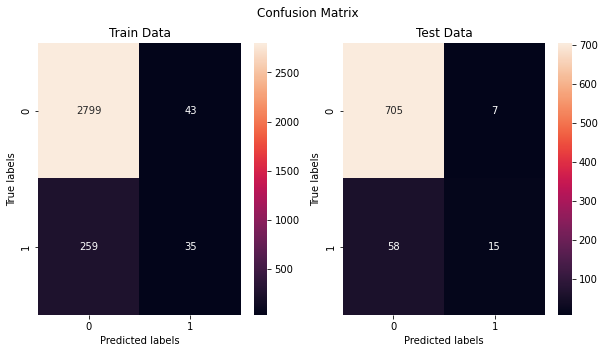

In [42]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')

In [ ]:
iv. Decision Tree

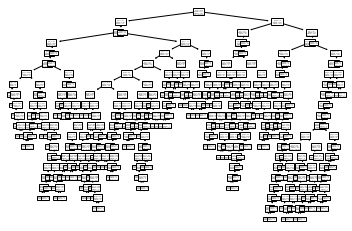

In [43]:
from sklearn import tree #decision tree from scikit learn
## running decision tree with entropy criterion for different depths
maximum_depth = [1,2,5,10,15,20]
train_accuracy_entropy = []
test_accuracy_entropy = []
for i in maximum_depth:
  #create a decision tree classifier with 'entropy' as criterion
  clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)
  #train using decision tree classifier and plot the resultant decision tree
  tree.plot_tree(clf.fit(train_X, train_y.ravel())) 
  #Get the trained model in clf_model
  clf_model = clf.fit(train_X,train_y.ravel())
  #We will now use the trained model for predition on the test data set
  predicted_labels = clf_model.predict(test_X)   
  #reshaping predicted_labels so that it is of the same shape as test_label
  predicted_labels = np.reshape(predicted_labels.data,(n_test,1))
  #If you wish to see how predicted_labels and test_label look, you can print them and check
  #print(predicted_labels)
  #print(test_label)
  #compute test set error and test set accuracy 
  test_error = np.sum(0.5*np.abs(predicted_labels-test_y))/len(test_y)*100.0 #Try to understand this equation
  test_accuracy = 100.0-test_error
  test_accuracy_entropy.append(test_accuracy)
  #print the test set accuracy 
  # print('test set accuracy using gini:', test_accuracy_gini)
  #We can also use the trained model clf_model to predict the train set 
  predicted_train_labels = clf_model.predict(train_X)
  #reshaping predicted_train_labels so that it is of the same shape as train_label
  predicted_train_labels = np.reshape(predicted_train_labels.data,(n_train,1))
  #compute train set error and train set accuracy 
  train_error = np.sum(0.5*np.abs(predicted_train_labels-train_y))/len(train_y)*100.0
  train_accuracy = 100.0-train_error
  train_accuracy_entropy.append(train_accuracy)


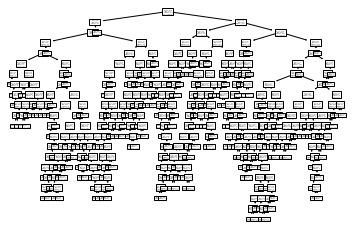

In [44]:
from sklearn import tree #decision tree from scikit learn
## running decision tree with entropy criterion for different depths
maximum_depth = [1,2,5,10,15,20]
train_accuracy_gini = []
test_accuracy_gini = []
for i in maximum_depth:
  #create a decision tree classifier with 'entropy' as criterion
  clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=i)
  #train using decision tree classifier and plot the resultant decision tree
  tree.plot_tree(clf.fit(train_X, train_y.ravel())) 
  #Get the trained model in clf_model
  clf_model = clf.fit(train_X,train_y.ravel())
  #We will now use the trained model for predition on the test data set
  predicted_labels = clf_model.predict(test_X)   
  #reshaping predicted_labels so that it is of the same shape as test_label
  predicted_labels = np.reshape(predicted_labels.data,(n_test,1))
  #If you wish to see how predicted_labels and test_label look, you can print them and check
  #print(predicted_labels)
  #print(test_label)
  #compute test set error and test set accuracy 
  test_error = np.sum(0.5*np.abs(predicted_labels-test_y))/len(test_y)*100.0 #Try to understand this equation
  test_accuracy = 100.0-test_error
  test_accuracy_gini.append(test_accuracy)
  #print the test set accuracy 
  # print('test set accuracy using gini:', test_accuracy_gini)
  #We can also use the trained model clf_model to predict the train set 
  predicted_train_labels = clf_model.predict(train_X)
  #reshaping predicted_train_labels so that it is of the same shape as train_label
  predicted_train_labels = np.reshape(predicted_train_labels.data,(n_train,1))
  #compute train set error and train set accuracy 
  train_error = np.sum(0.5*np.abs(predicted_train_labels-train_y))/len(train_y)*100.0
  train_accuracy = 100.0-train_error
  train_accuracy_gini.append(train_accuracy)

In [45]:
print ('train accuracy using entropy:')
print (train_accuracy_entropy)
print ('train accuracy using gini')
print (train_accuracy_gini)
print ('test accuracy using entropy')
print (test_accuracy_entropy)
print ('test accuracy using gini')
print (test_accuracy_gini)

train accuracy using entropy:
[95.3125, 95.3125, 96.39668367346938, 98.10267857142857, 99.26658163265306, 99.82461734693878]
train accuracy using gini
[95.3125, 95.3125, 96.81122448979592, 98.27806122448979, 99.4579081632653, 99.84056122448979]
test accuracy using entropy
[95.35031847133757, 95.35031847133757, 96.17834394904459, 95.6687898089172, 95.92356687898089, 96.05095541401273]
test accuracy using gini
[95.35031847133757, 95.35031847133757, 95.73248407643312, 95.54140127388536, 95.54140127388536, 95.92356687898089]


In [46]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20)
# tree.plot_tree(clf.fit(train_features, train_label)) 
clf_model = clf.fit(train_X,train_y)

In [47]:
predicted_train_y = clf_model.predict(train_X)
predicted_test_y = clf_model.predict(test_X)

In [48]:
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2842
           1       0.99      0.97      0.98       294

    accuracy                           1.00      3136
   macro avg       0.99      0.98      0.99      3136
weighted avg       1.00      1.00      1.00      3136

Test Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       712
           1       0.57      0.53      0.55        73

    accuracy                           0.92       785
   macro avg       0.76      0.75      0.75       785
weighted avg       0.92      0.92      0.92       785



In [49]:
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[2840    2]
 [  10  284]]
Confusion matrix test set:
[[683  29]
 [ 34  39]]


Text(0.5, 0.98, 'Confusion Matrix')

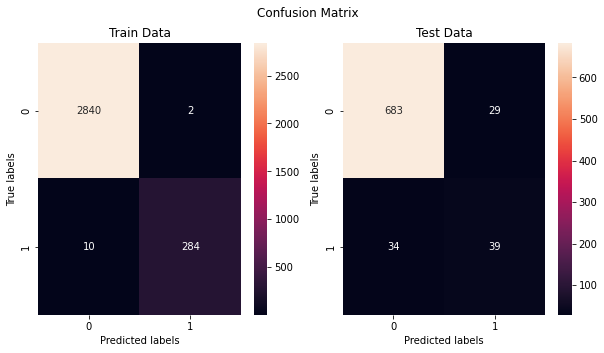

In [50]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')

v. Random Forest

In [52]:
# We will use cross validation to find random forest hyperparameters.
# We will first find best max depths for a given set of estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import math

num_features = train_X.shape[1]
estimators = [5,10,50,100,150,200]
constant = math.sqrt(num_features)
max_depth = constant*np.array([0.25,0.5, 0.75,1,1.25,1.50,1.75,2])
max_depth = np.ceil(max_depth)
print ('maximum depth', max_depth)
best_depth = {}
cv_k = 5 #5-fold cross validation
for n_estimate in estimators:
  avg_score = np.zeros(len(max_depth))
  # print (avg_score)
  for depth in max_depth:
    clf_rf = RandomForestClassifier(n_estimators = n_estimate,max_depth = depth,  random_state=0)
    scores = cross_val_score(clf_rf, train_X, train_y.ravel(), cv=cv_k) 
    # print ('scores',scores)
    avg_score[np.where(max_depth==depth)] = np.mean(scores)

  # print ('avg score',avg_score)
  max_score_index = np.argmax(avg_score)
  # print (max_score_index)
  best_depth[n_estimate] = max_depth[int(max_score_index)]

print ('maximum depth = ', best_depth)

maximum depth [2. 3. 4. 5. 6. 7. 8. 9.]
maximum depth =  {5: 9.0, 10: 9.0, 50: 9.0, 100: 9.0, 150: 9.0, 200: 9.0}


In [53]:
## Now let's find the number of estimators
avg_score = np.zeros(len(estimators))
# print (estimators)
for n_estimate in estimators:
    depth = best_depth[n_estimate]
    clf_rf = RandomForestClassifier(n_estimators = n_estimate,max_depth = depth,  random_state=0)
    scores = cross_val_score(clf_rf, train_X, train_y.ravel(), cv=cv_k) 
    avg_score[estimators.index(n_estimate)] = np.mean(scores)

print ('avg score =',avg_score)
max_score_index = np.argmax(avg_score)
best_estimator = estimators[max_score_index]
best_max_depth = best_depth[best_estimator]
print ('Number of estimators = ',best_estimator)
print ('maximum depth =',best_max_depth)


avg score = [0.92984488 0.93175875 0.93207723 0.93112029 0.93175825 0.93271569]
Number of estimators =  200
maximum depth = 9.0


In [54]:
clf_rf = RandomForestClassifier(n_estimators = best_estimator,max_depth = best_max_depth,  random_state=0)
clf_model = clf_rf.fit(train_X, train_y.ravel())

In [55]:
predicted_train_y = clf_rf.predict(train_X)
predicted_test_y = clf_rf.predict(test_X)

In [56]:
train_cr = classification_report(train_y, predicted_train_y)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_y, predicted_test_y)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2842
           1       0.92      0.55      0.69       294

    accuracy                           0.95      3136
   macro avg       0.94      0.77      0.83      3136
weighted avg       0.95      0.95      0.95      3136

Test Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       712
           1       0.81      0.34      0.48        73

    accuracy                           0.93       785
   macro avg       0.87      0.67      0.72       785
weighted avg       0.92      0.93      0.92       785



In [57]:
cm_train = confusion_matrix(train_y, predicted_train_y)
print('Confusion matrix train set:')
print(cm_train)

cm_test = confusion_matrix(test_y, predicted_test_y)
print('Confusion matrix test set:')
print(cm_test)

Confusion matrix train set:
[[2827   15]
 [ 131  163]]
Confusion matrix test set:
[[706   6]
 [ 48  25]]


Text(0.5, 0.98, 'Confusion Matrix')

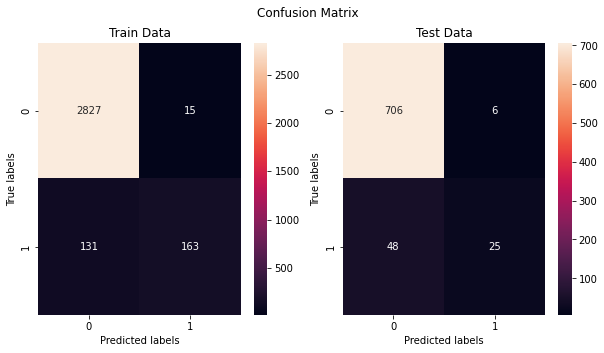

In [58]:
fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
ax1, ax2 = axes
sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
ax1.set_title('Train Data')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2.set_title('Test Data')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])

fig.suptitle('Confusion Matrix')

vi. Kernel Machines

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

gammas = [0.0001,0.001, 0.01, 0.1, 1, 20, 40, 60, 80, 100]
kernels = ['sigmoid','rbf'] #linear, poly
best_gamma = {}
cv_k = 5 #5-fold cross validation
for kernel_ in kernels:
  print (kernel_,'kernel')
  avg_score = np.zeros(len(gammas))
  for gamma in gammas:
    clf = SVC(kernel=kernel_, gamma=gamma, random_state=1)
    scores = cross_val_score(clf, train_X, train_y.ravel(), cv=cv_k) 
    avg_score[gammas.index(gamma)] = np.mean(scores)
    # print ('average score for kernel',kernel_, 'at gamma = ', gamma,'is',avg_score[gammas.index(gamma)])
  print (avg_score)
  max_score_index = np.argmax(avg_score)
  # print (max_score_index)
  best_gamma[kernel_] = gammas[int(max_score_index)]

print ('best hyperparameters = ', best_gamma)

sigmoid kernel
[0.89349089 0.86958167 0.88552555 0.907207   0.90625006 0.90625006
 0.90625006 0.90625006 0.90625006 0.90625006]
rbf kernel
[0.90625006 0.90625006 0.90752598 0.92346783 0.92665661 0.92761406
 0.92793303 0.92665763 0.92410681 0.92410681]
best hyperparameters =  {'sigmoid': 0.1, 'rbf': 40}


kernel: sigmoid
Train Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2842
           1       0.48      0.09      0.14       294

    accuracy                           0.91      3136
   macro avg       0.70      0.54      0.55      3136
weighted avg       0.87      0.91      0.87      3136

Test Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       712
           1       0.33      0.05      0.09        73

    accuracy                           0.90       785
   macro avg       0.62      0.52      0.52       785
weighted avg       0.86      0.90      0.87       785

kernel: rbf
Train Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2842
           1       0.98      0.94      0.96       294

    accuracy                           0.99      3136
   macro avg       0.99      0.97      0.98      3136
weigh

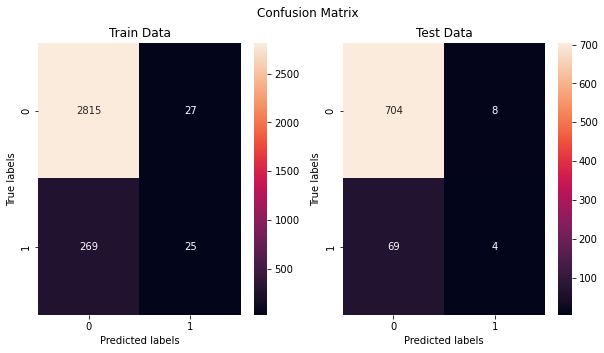

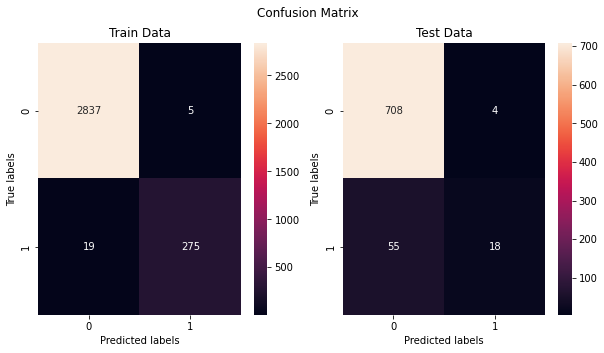

In [68]:
kernels = ['sigmoid','rbf'] #linear, poly
train_accuracy = {}
test_accuracy = {}
for kernel_ in kernels:
  clf = SVC(kernel=kernel_,gamma=best_gamma[kernel_],max_iter = 10000)
  clf_model = clf.fit(train_X,train_y.ravel())
  predicted_train_y = clf_model.predict(train_X)
  predicted_test_y = clf_model.predict(test_X)

  print('kernel:', kernel_)
  train_cr = classification_report(train_y, predicted_train_y)
  print("Train Report:")
  print(train_cr)
  test_cr = classification_report(test_y, predicted_test_y)
  print("Test Report:")
  print(test_cr)

  cm_train = confusion_matrix(train_y, predicted_train_y)
  cm_test = confusion_matrix(test_y, predicted_test_y)
  
  fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
  ax1, ax2 = axes
  sns.heatmap(cm_train, annot = True, fmt = 'g', ax = ax1)
  sns.heatmap(cm_test, annot = True, fmt = 'g', ax = ax2)
  ax1.set_title('Train Data')
  ax1.set_xlabel('Predicted labels')
  ax1.set_ylabel('True labels')
  ax1.xaxis.set_ticklabels(['0', '1'])
  ax1.yaxis.set_ticklabels(['0', '1'])

  ax2.set_title('Test Data')
  ax2.set_xlabel('Predicted labels')
  ax2.set_ylabel('True labels')
  ax2.xaxis.set_ticklabels(['0', '1'])
  ax2.yaxis.set_ticklabels(['0', '1'])

  fig.suptitle('Confusion Matrix')